# 济南二手房区域分析


## 项目描述

### 随着时代的发展,房价成了当前社会最关心的问题. 这个项目我们通过抓取某二手房网站大量数据进行分析.

## 项目步骤: <br>
1. 读取数据<br>
2. 对数据进行清洗<br>
3. 分析不同区域的房价均值水平<br>
4. 查看不同区域二手房的数量<br>
5. 不同户型对用户的热度<br>
6. 根据数据特性,通过模型对房价进行预测<br>

图片不显示查看 img_html

In [1]:
# 导库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('./secondhand_house.xlsx')
data

,小区名字,总价,户型,面积,单价,朝向,楼层,装饰,区域,街道
0,蓝调国际,48.0,1室0厅,41.74,11500,北,高楼层(共23层),精装,历下,化纤厂路
1,祥泰汇东国际,29.0,1室1厅,38.29,7574,南,低楼层(共32层),毛坯,历下,盛福
2,华强广场,46.0,1室0厅,38.51,11945,西,高楼层(共29层),简装,历下,山大路
3,正大时代广场,33.0,1室0厅,30.2,10928,北,中楼层(共20层),简装,历下,历东
4,金汇通大厦,39.0,1室1厅,44.28,8808,西,中楼层(共5层),简装,历下,环山
...,...,...,...,...,...,...,...,...,...,...
51935,鲁商常春藤,175.0,4室2厅,173.08平米,10111,南 北,低楼层(共18层),其他,长清,长清大学城
51936,鲁商常春藤,110.0,3室2厅,105平米,10477,南 北,低楼层(共18层),其他,长清,长清大学城
51937,中建长清湖瑜园,230.0,2室2厅,108平米,21297,南,2层,其他,长清,长清大学城
51938,中建长清湖知园,154.0,3室2厅,145平米,10621,南 北,中楼层(共11层),其他,长清,长清大学城


In [3]:
# 完整型分析
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51940 entries, 0 to 51939
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   小区名字    51940 non-null  object 
 1   总价      51940 non-null  float64
 2   户型      51940 non-null  object 
 3   面积      51940 non-null  object 
 4   单价      51940 non-null  int64  
 5   朝向      51940 non-null  object 
 6   楼层      51940 non-null  object 
 7   装饰      51940 non-null  object 
 8   区域      51940 non-null  object 
 9   街道      51940 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 4.0+ MB


### 除总价是浮点型,单价是整形,其余全为字符型  无缺省值

## 一. 数据清洗

### 观察上述数据,发现面积是字符型数据,无法进行计算.所以对应数据中带有的字符进行删除,仅保留数字部分,再将数值转化成float类型输出数据

In [4]:
# 将面积转换为浮点类型
# 先去除"平米"
data['面积'] = data['面积'].map(lambda p: p.replace('平米',''))
# 转化类型
data['面积'] = data['面积'].astype(float)
data

,小区名字,总价,户型,面积,单价,朝向,楼层,装饰,区域,街道
0,蓝调国际,48.0,1室0厅,41.74,11500,北,高楼层(共23层),精装,历下,化纤厂路
1,祥泰汇东国际,29.0,1室1厅,38.29,7574,南,低楼层(共32层),毛坯,历下,盛福
2,华强广场,46.0,1室0厅,38.51,11945,西,高楼层(共29层),简装,历下,山大路
3,正大时代广场,33.0,1室0厅,30.20,10928,北,中楼层(共20层),简装,历下,历东
4,金汇通大厦,39.0,1室1厅,44.28,8808,西,中楼层(共5层),简装,历下,环山
...,...,...,...,...,...,...,...,...,...,...
51935,鲁商常春藤,175.0,4室2厅,173.08,10111,南 北,低楼层(共18层),其他,长清,长清大学城
51936,鲁商常春藤,110.0,3室2厅,105.00,10477,南 北,低楼层(共18层),其他,长清,长清大学城
51937,中建长清湖瑜园,230.0,2室2厅,108.00,21297,南,2层,其他,长清,长清大学城
51938,中建长清湖知园,154.0,3室2厅,145.00,10621,南 北,中楼层(共11层),其他,长清,长清大学城


## 二. 济南区域二手房均价分析

### 1.通过groupby方法实现二手房区域划分,然后通过mean方法计算每个区域的二手房均价,最后分别通过index属性与values属性获取所有区域信息与对应的均价.

In [5]:
# 将房子区域分组
group = data.groupby('区域')
# 计算每个区域的均价
average_price_group = group['单价'].mean()
# 区域
region = average_price_group.index
# 区域对应的均价
average_price = average_price_group.values.astype(int)
region,average_price

(Index(['历下', '历城', '商河', '天桥', '市中', '平阴', '槐荫', '济阳', '章丘', '长清', '高新'], dtype='object', name='区域'),
 array([22611, 15787,  8321, 14849, 18513,  6981, 15370,  8485,  9146,
        10680, 17207]))

### 2. 绘制并显示各区二手房均价分析图.

In [6]:
# 导入柱形图模块
from pyecharts.charts import Bar,Pie
from pyecharts import options as opts

bar = (
    Bar()
    .add_xaxis(['区域均价'])
    .add_yaxis("章丘",[9146])
    .add_yaxis("高新",[17207])
    .add_yaxis("济阳",[8485])
    .add_yaxis("历城",[15787])
    .add_yaxis("历下",[22611])
    .add_yaxis("市中",[18513])
    .add_yaxis("天桥",[14849])
    .add_yaxis("商河",[8321])
    .add_yaxis("平阴",[6981])
    .add_yaxis("槐荫",[15370])
    .add_yaxis("长清",[10680])
    .set_global_opts(title_opts=opts.TitleOpts(title="济南二手房"))
)
bar.render_notebook()

## 通过图像直观的发现济南区域均价前三的分别是历下、市中、高新，后面名分别是平阴、商河、济阳。

## 二. 济南区域二手房数量分析

In [7]:
# 区域元素种类
list_area = list(set(data['区域']))
# 种类对应数量
list_sum = [2081,2161,15,9030,9092,11485,8014,12,7,8204,1839]
pie = (
  Pie()
        .add(
        "",
        [list(z) for z in zip(list_area, list_sum)],
        radius=["40%", "60%"],
        label_opts=opts.LabelOpts(
            position="outside",
            formatter="{a|{a}}{abg|}\n{hr|}\n {b|{b}: }{c}  {per|{d}%}  ",
            background_color="#eee",
            border_color="#aaa",
            border_width=1,
            border_radius=4,
            rich={
                "a": {"color": "#999", "lineHeight": 22, "align": "center"},
                "abg": {
                    "backgroundColor": "#e3e3e3",
                    "width": "100%",
                    "align": "right",
                    "height": 22,
                    "borderRadius": [4, 4, 0, 0],
                },
                "hr": {
                    "borderColor": "#aaa",
                    "width": "100%",
                    "borderWidth": 0.5,
                    "height": 0,
                },
                "b": {"fontSize": 16, "lineHeight": 33},
                "per": {
                    "color": "#eee",
                    "backgroundColor": "#334455",
                    "padding": [2, 4],
                    "borderRadius": 2,
                },
            },
        ),
    )
    .set_global_opts(title_opts=opts.TitleOpts(title="数量"))
)
pie.render_notebook()

### 通过图像发现济南区域二手房数量主要在市中、历城、历下，而济阳、商河、平阴分别占0.03、0.02、 0.01基本没有二手房出租 。

In [8]:
data2=data['区域'].value_counts()
data2

市中    11485
历下     9092
历城     9030
槐荫     8204
天桥     8014
高新     2161
章丘     2081
长清     1839
济阳       15
商河       12
平阴        7
Name: 区域, dtype: int64

In [9]:
# 导入省地图
from pyecharts import options as opts
from pyecharts.charts import Map
# 区域元素种类
list_area = ['章丘区','历下区','历城区','平阴县','槐荫区','商河县','天桥区','长清区','济阳县','高新区','市中区']
# 种类对应数量
list_sum = list(set(data['区域'].value_counts()))
c=(
    Map()
    .add(
        "",
        [list(z) for z in zip(list_area, list_sum)],
        "济南"
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="济南区域二手房数量"),
        visualmap_opts=opts.VisualMapOpts(
        min_=0,
        max_=12000,
#         is_piecewies=True
        )
    )
)
c.render_notebook()

### 通过图像颜色直观的看出济南市二手房数量中心多,周边少、区级数量多,县级数量少。

## 三. 热门户型均价分析

### 在实现热门户型均价分析时,首先需要将户型进行分组并获取每个分组所对应的数量,然后对户型分组数量进行降序处理,提取前5组的户型数据,作为热门户型的数据,最后计算每个户型均价.

In [10]:
from pyecharts.charts import Funnel
from pyecharts.globals import ThemeType
# 房子户型分组数量
house_type_number = data.groupby('户型').size()
# 将户型分组数量进行降序
sort_number = house_type_number.sort_values(ascending=False)
# 提取前5组的用户类型
top_five = sort_number.head()
top_number = list(top_five.index)

funnel = (
    Funnel(init_opts=opts.InitOpts(theme=ThemeType.CHALK))
    .add(
        "",
        [list(i) for i in zip(top_number,top_five)],
        label_opts=opts.LabelOpts(position="inside")
        )
    .set_global_opts(title_opts=opts.TitleOpts(title="热门户型数量",pos_left=0.4))
)

funnel.render_notebook()

In [11]:
# 计算每个户型的均价
house_type_mean = data.groupby('户型')['单价'].mean()
house_type_mean
# 户型
type = house_type_mean[top_five.index].index
# 户型对应均价
type_number = house_type_mean[top_five.index].values
# print(list(type),list(type_number.astype(int)))

In [12]:
top=(
    Bar()
    .add_xaxis(list(type))
    .add_yaxis("户型",[17061, 16887, 16352, 15942, 18241])
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Top-5"),
        toolbox_opts=opts.ToolboxOpts(),# 这里使用toolbox_optx图表就右上方有一些工具
        legend_opts=opts.LegendOpts(is_show=False)# 隐藏图例
    )
)
top.render_notebook()

### 上图可知: 济南最热门的二手房前五类型分别是3室2厅,2室1厅,2室2厅,1室1厅,3室1厅,其中均价最高的是三室一厅.

## 四. 二手房房价预测

### 1. 在实现济南二手房房价预测时,需要提供二手房源数据中的参考数据(特征值),这里将"户型","面积"作为参考数据来进行房价的预测,所以先观察"户型"数据是否符合分析条件.如不符合,需再次对数据进行清洗处理.最有通过数据中已知的参考数据"面积"及户型进行未知房价的预测.

In [13]:
data_copy = data.copy() # 复制数据
data_copy[['户型','面积']].head()

,户型,面积
0,1室0厅,41.74
1,1室1厅,38.29
2,1室0厅,38.51
3,1室0厅,30.20
4,1室1厅,44.28


### 2. 从输出结果来看,"户型"数据中包含文字信息,而文字不能实现数据分析师的拟合工作,所以需要将文字信息清洗.

In [14]:
data_copy[['室','厅']] = data_copy['户型'].str.extract('(\d+)室(\d+)厅') # 拆分字段为 室  厅  1  0
data_copy['室'] = data_copy['室'].astype(float)
data_copy['厅'] = data_copy['厅'].astype(float)
data_copy[['室','厅']].head()

,室,厅
0,1.0,0.0
1,1.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,1.0


In [15]:
data_copy.head()

,小区名字,总价,户型,面积,单价,朝向,楼层,装饰,区域,街道,室,厅
0,蓝调国际,48.0,1室0厅,41.74,11500,北,高楼层(共23层),精装,历下,化纤厂路,1.0,0.0
1,祥泰汇东国际,29.0,1室1厅,38.29,7574,南,低楼层(共32层),毛坯,历下,盛福,1.0,1.0
2,华强广场,46.0,1室0厅,38.51,11945,西,高楼层(共29层),简装,历下,山大路,1.0,0.0
3,正大时代广场,33.0,1室0厅,30.20,10928,北,中楼层(共20层),简装,历下,历东,1.0,0.0
4,金汇通大厦,39.0,1室1厅,44.28,8808,西,中楼层(共5层),简装,历下,环山,1.0,1.0


In [16]:
# 清除没有参考意义的数据
del data_copy['小区名字']
del data_copy['户型']
del data_copy['单价']
del data_copy['朝向']
del data_copy['楼层']
del data_copy['装饰']
del data_copy['区域']
del data_copy['街道']
data_copy.dropna(axis = 0,how='any',inplace=True) # 防止有空值
# 获取"面积"小于300平米的房子信息
new_data = data_copy[data['面积']<300].reset_index(drop=True)
# new_data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


### 3. 添加要预测的数据,其中包含"总价","面积","室","厅",总价为 None.然后数据标准化,定义数据特征与目标数据,最后训练回归模型进行预测未知房价.

In [17]:
from sklearn.svm import LinearSVR # svm支持向量机

# 添加自定义模型数据
new_data.loc[51776] = [None, 115, 3.0 , 2.0]
new_data.loc[51777] = [None, 94, 2.0 ,2.0]
data_train = new_data.loc[0:51775]
x_list = ['面积', '室', '厅']       # 自定义参考量
data_mean = data_train.mean()      # 获取平均值
data_std = data_train.std()        # 获取标准偏差
data_train = (data_train - data_mean) / data_std # 数据标准化
x_train = data_train[x_list].values # 特征数据
y_train = data_train['总价'].values  # 目标数据 ,总价
linearsvr = LinearSVR(C=0.2) # 创建LinearSVR对象  是线性回归，只能使用线性核函数 C:惩罚参数
linearsvr.fit(x_train,y_train)   # 训练模型
# 标准化特征数据
x = ((new_data[x_list] - data_mean[x_list]) / data_std[x_list]).values
# # 添加预测房价信息
new_data[u'y_pred'] = linearsvr.predict(x) * data_std['总价'] + data_mean['总价'] # 预测的总价
print('真实值和预测值分别为:',new_data[['总价','y_pred']])

真实值和预测值分别为:           总价      y_pred
0       48.0   61.901361
1       29.0   52.628438
2       46.0   56.341743
3       33.0   42.038207
4       39.0   62.938689
...      ...         ...
51773  230.0  172.565962
51774  154.0  239.536230
51775  106.0  160.251155
51776    NaN  187.898913
51777    NaN  148.468547

[51778 rows x 2 columns]


In [18]:
y = new_data[['总价']][51761:] # 获取51761后的真实值
y_pred = new_data[['y_pred']][51761:] # 获取51761后的预测房价
# y,y_pred

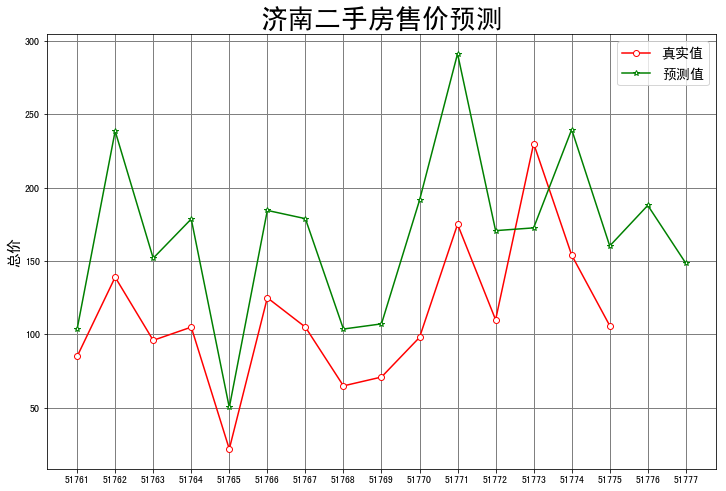

In [19]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']  #显示中文标签

fig = plt.figure(figsize=(12,8))
plt.title('济南二手房售价预测',fontsize='27')

# plt.xticks()
plt.plot(y.index,y,label="真实值",color='r',marker='o',mfc='w')
plt.plot(y.index,y_pred,label="预测值",color='g',marker='*',mfc='w')
plt.ylabel('总价',fontsize='15')
plt.xticks(y.index)
plt.grid(color='0.5', linestyle='-',linewidth=1) # 网格
plt.legend(['真实值','预测值'],fontsize=14) # 设置图例 真实值.
# plt.grid(axis='y')
plt.show()

### 真实值和预测值曲线接近一致,某一个点出现误差正常现象,分析时误差的范围越接近零模型越理想.

## 在分析津南二手房数据时, 首先分析特征数据,然后通过回归算法的函数预测二手房的售价.